In [2]:
import pandas as pd
import numpy as num
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib notebook

In [3]:
dataset=pd.read_csv('ckdFinal2.csv')
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,8.0,0.0,2.0,3.0,0.0,0.0,1.0,0,0,1.0,...,3.0,1.0,1.0,1,0,0,1,1,1,1
1,6.0,2.0,4.0,0.0,0.0,0.0,0.0,0,0,1.0,...,2.0,2.0,1.0,1,0,1,1,0,0,1
2,6.0,2.0,3.0,3.0,0.0,1.0,0.0,1,0,1.0,...,4.0,2.0,1.0,1,0,1,0,0,1,1
3,9.0,1.0,4.0,0.0,0.0,0.0,0.0,0,0,2.0,...,4.0,2.0,1.0,1,1,0,1,0,1,1
4,4.0,2.0,5.0,1.0,0.0,1.0,1.0,0,0,2.0,...,1.0,1.0,2.0,1,1,0,1,1,1,1


In [4]:
print(dataset.isna().sum()) 
dataset.dropna(inplace=True) 
print(dataset.isnull().sum())

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64
age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64


<IPython.core.display.Javascript object>


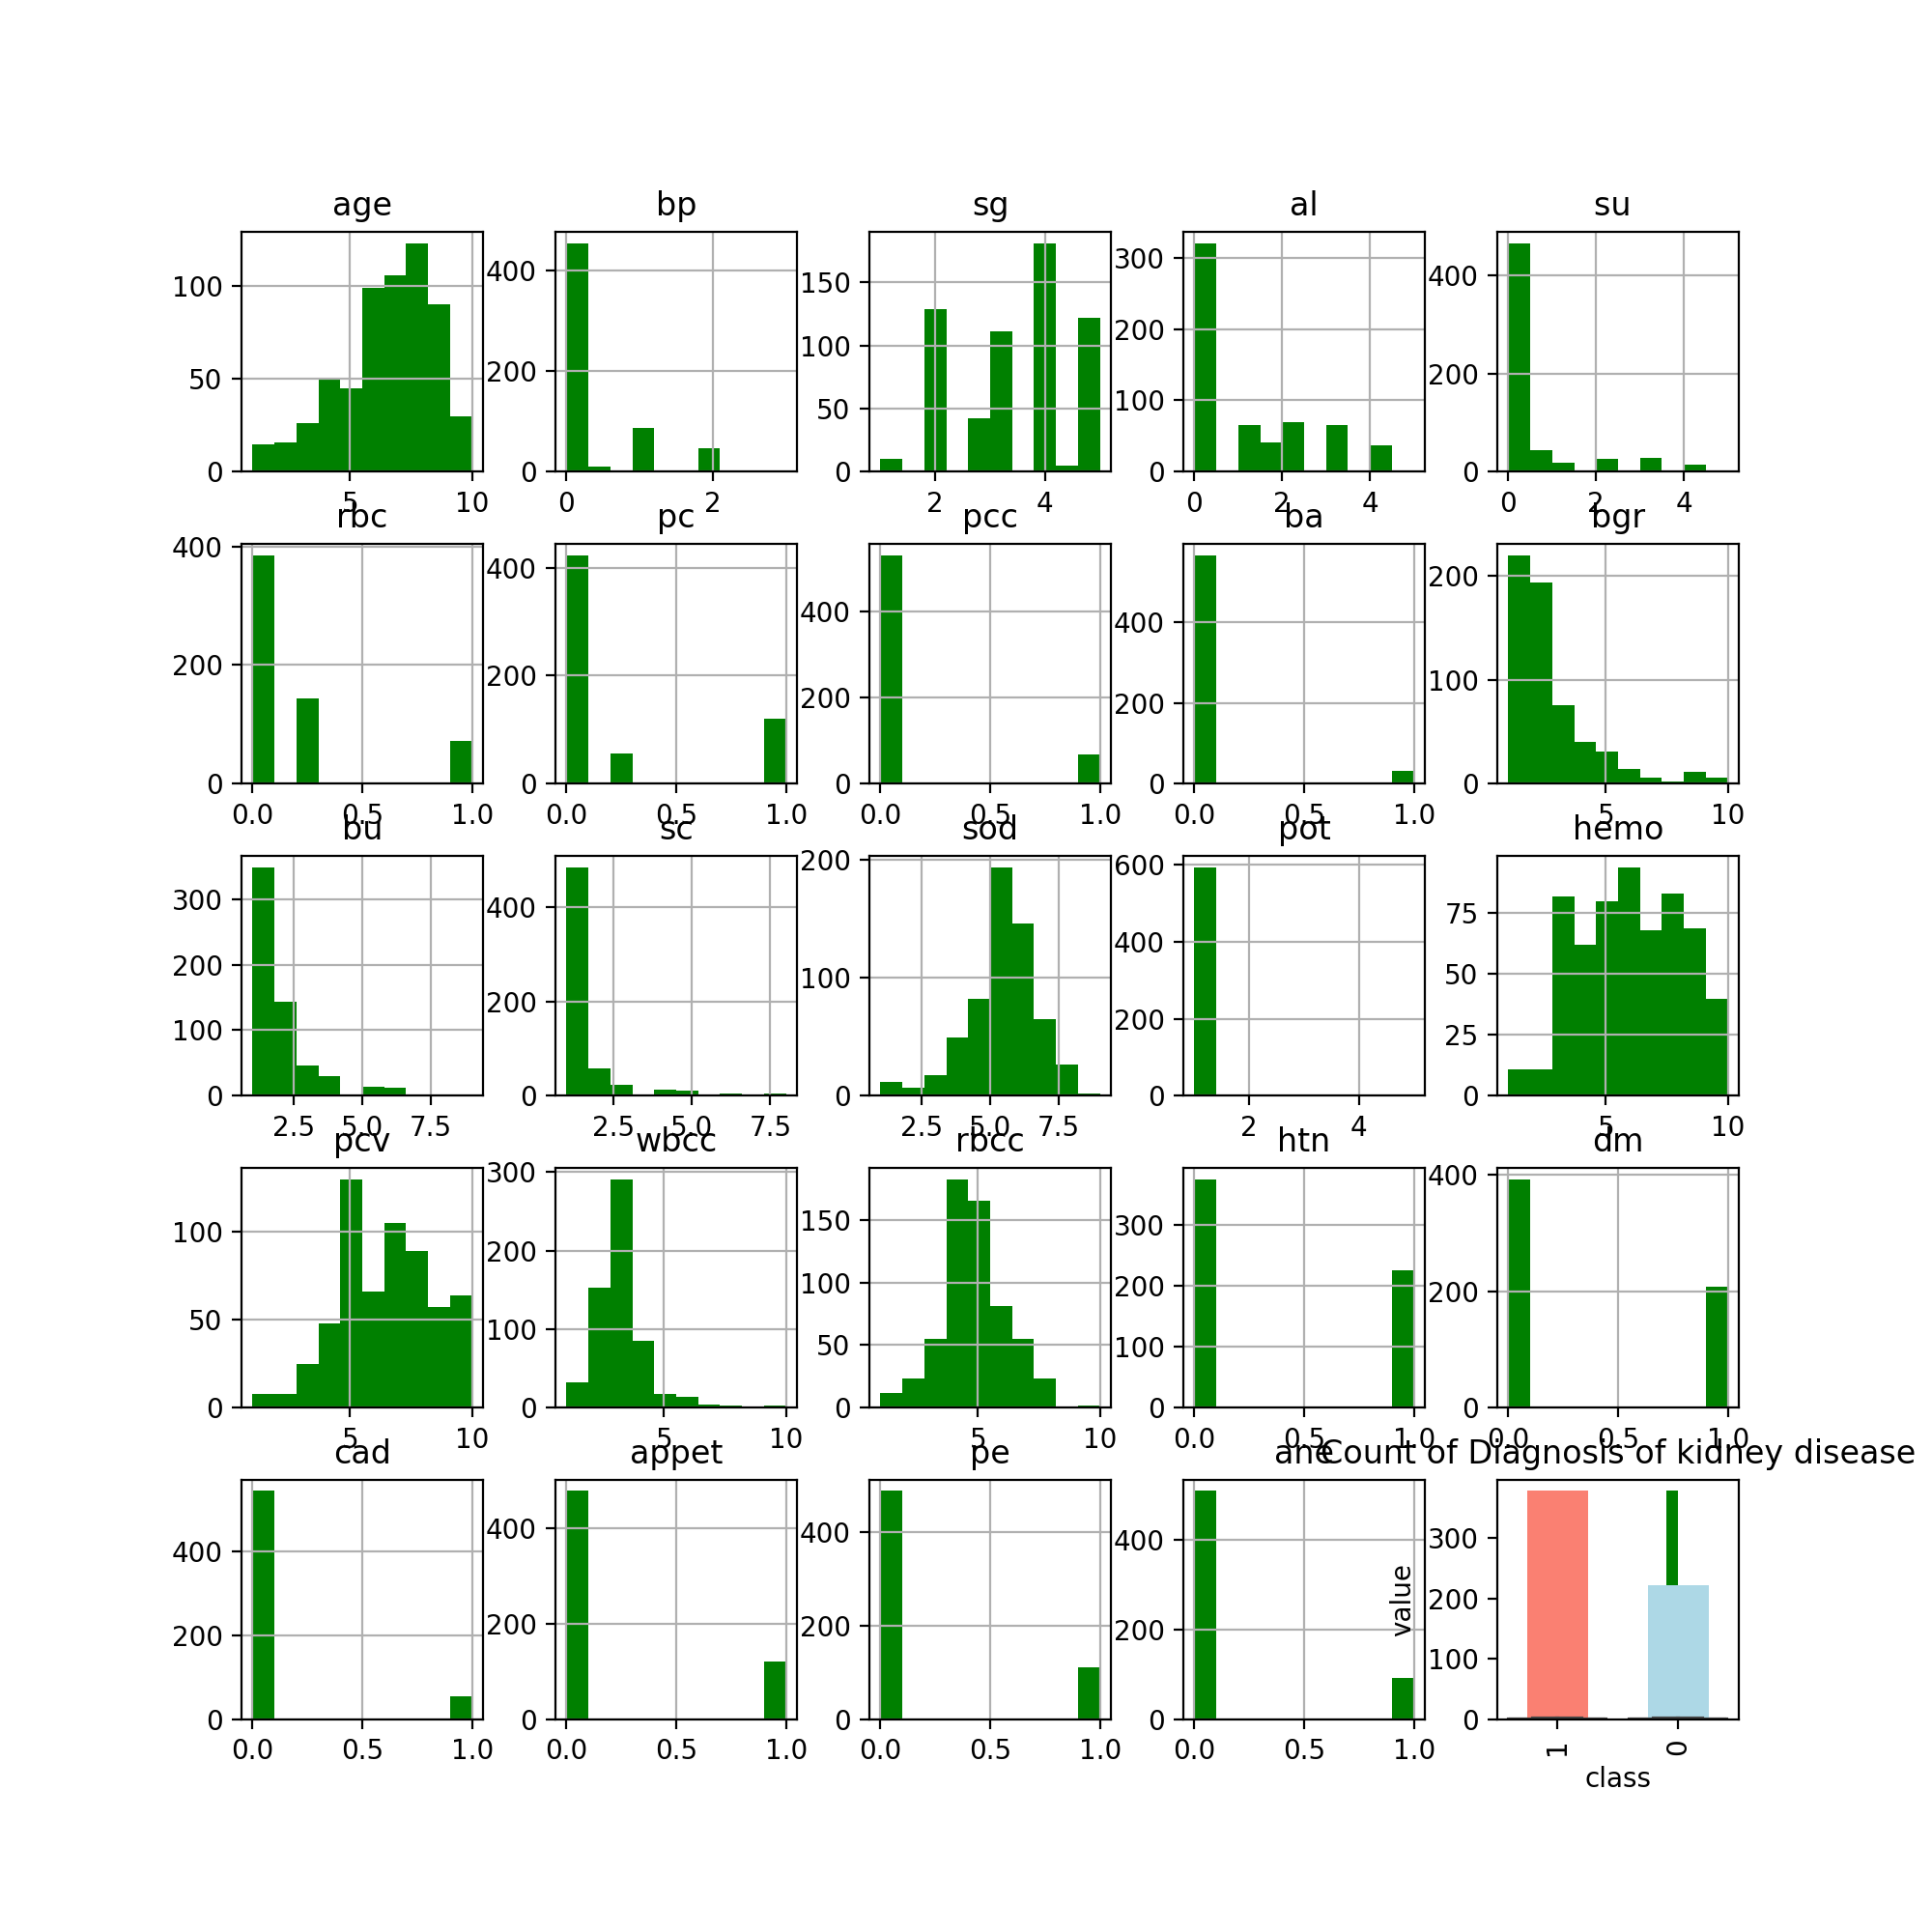

In [5]:
dataset.hist(figsize=(10,10),color='g')
plt.show()

In [6]:
d = pd.DataFrame(data = num.random.random(size=(601,24)),columns=['age',
 'bp',
 'sg',
 'al',
 'su ',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wbcc',
 'rbcc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane'])
sns.boxplot(x="variable",y="value",data=pd.melt(d))
plt.show()


In [7]:
dataset['class'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of Diagnosis of kidney disease")

<Axes: title={'center': 'Count of Diagnosis of kidney disease'}, xlabel='class', ylabel='value'>

In [8]:
dataset['class'].value_counts()

class
1    378
0    222
Name: count, dtype: int64

<IPython.core.display.Javascript object>


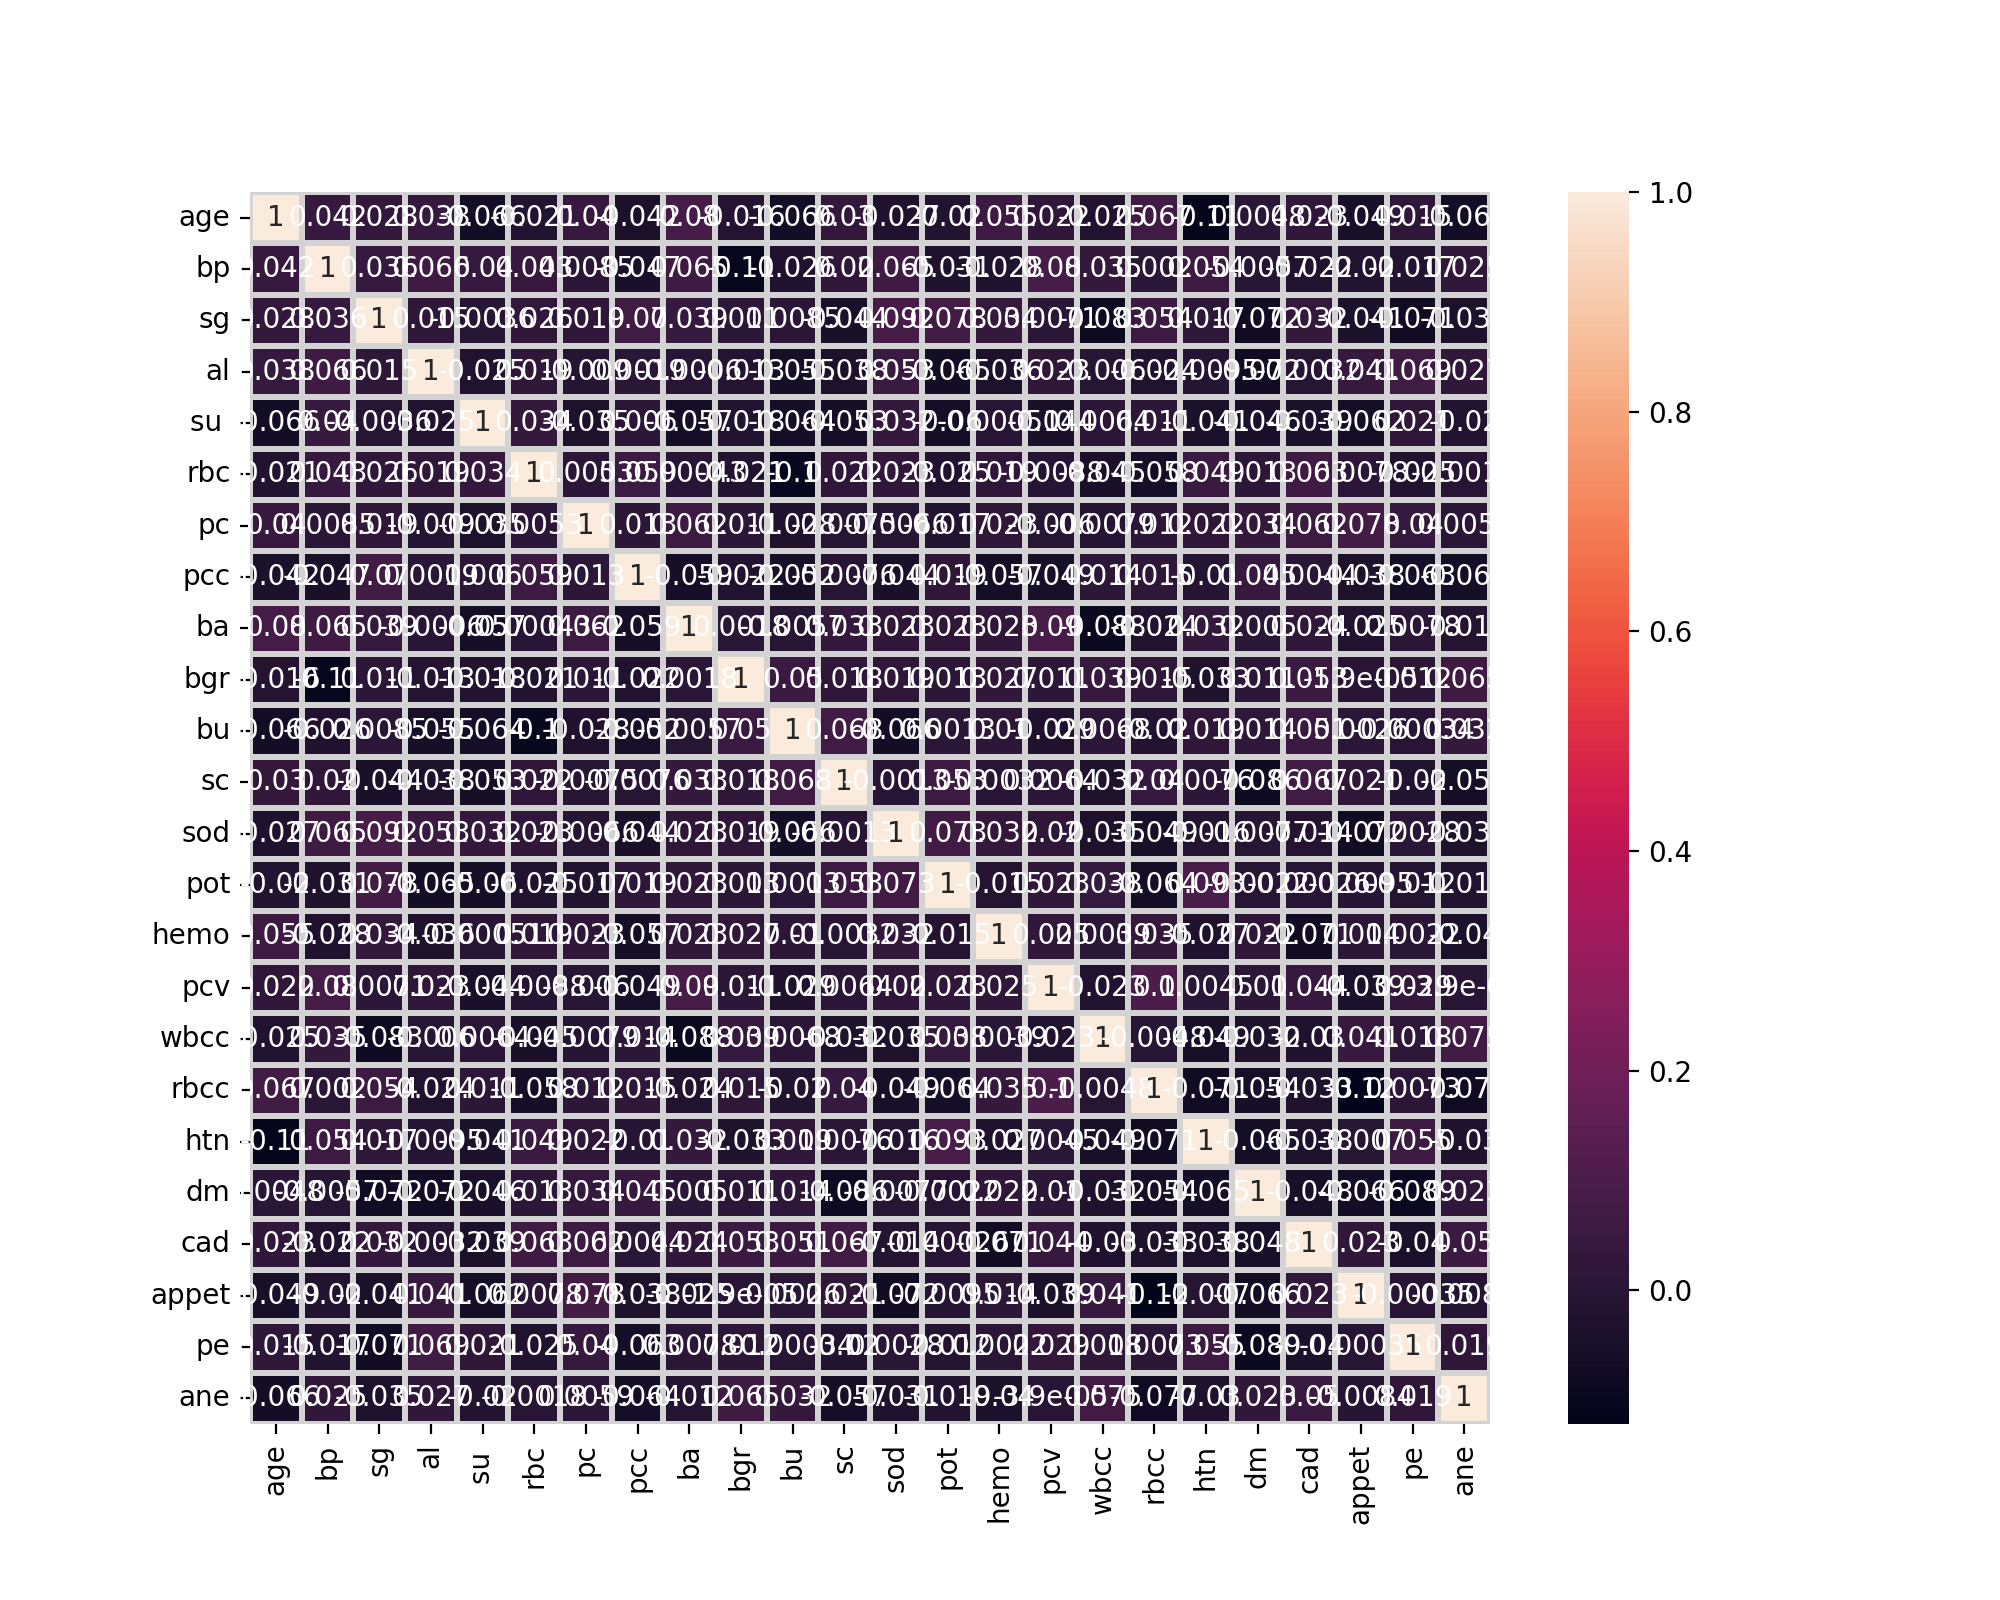

In [9]:
plt.figure(figsize=(10,8))
cor = d.corr()
sns.heatmap(cor,annot=True,linewidths=2, linecolor = 'lightgrey')
plt.show()

In [10]:
X=dataset.iloc[:,0:24]
Y=dataset.iloc[:,-1]
f=list(X.columns)

In [11]:
X=X.values
Y=Y.values

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.25,random_state=45)
X_train

array([[7. , 2. , 3. , ..., 0. , 0. , 1. ],
       [6. , 0. , 5. , ..., 0. , 0. , 1. ],
       [9. , 0. , 4.4, ..., 0. , 0. , 0. ],
       ...,
       [6. , 0. , 4. , ..., 0. , 0. , 0. ],
       [8. , 0. , 4. , ..., 0. , 0. , 0. ],
       [7. , 1. , 3. , ..., 0. , 0. , 1. ]])

In [13]:
########################         KNN - Nearest Neighbors

In [14]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train,Y_train)
Y_pred=KNN.predict(X_test)
print (classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        55
           1       1.00      0.95      0.97        95

    accuracy                           0.97       150
   macro avg       0.96      0.97      0.96       150
weighted avg       0.97      0.97      0.97       150



In [15]:
from sklearn import tree
DTC = tree.DecisionTreeClassifier()
DTC.fit(X_train,Y_train)
Y_pred=DTC.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        55
           1       1.00      0.98      0.99        95

    accuracy                           0.99       150
   macro avg       0.98      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [16]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=10)
RFC.fit(X_train,Y_train)
Y_pred=RFC.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       1.00      0.99      0.99        95

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [17]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train,Y_train)
Y_pred=RFC.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       1.00      0.99      0.99        95

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [18]:
from sklearn.neural_network import MLPClassifier
MLPC = MLPClassifier()
MLPC.fit(X_train,Y_train)
Y_pred=MLPC.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        95

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



C:\Users\gvthi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [60]:
## features selected by Decision Tree
s=set()
s={'age','bp','al','su ','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','pcv','wbcc','rbcc',
   'htn','dm','cad','appet','pe','ane'}
X=dataset.iloc[:,0:24]
X=X.drop(s,axis=1)
X.head()
Y=dataset.iloc[:,-1]

In [75]:
## features selected by Random Forest
s=set()
s=
X=dataset.iloc[:,0:24]
X=X.drop(s,axis=1)
X.head()

,sg,al,rbc,hemo,pcv
0,2.0,3.0,0.0,2.0,3.0
1,4.0,0.0,0.0,2.0,2.0
2,3.0,3.0,1.0,3.0,4.0
3,4.0,0.0,0.0,4.0,4.0
4,5.0,1.0,1.0,1.0,1.0


In [100]:
dataset=pd.read_csv('p1.csv')  #partition 1

In [123]:
dataset=pd.read_csv('p2.csv')  #partition 2

In [133]:
dataset=pd.read_csv('p3.csv')  #partition 3

In [91]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
X=dataset.iloc[:,0:24]
Y=dataset.iloc[:,-1].values
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X, Y)
sel.get_support()
selected_feat= X.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat[:5])
s=set()
s={'age', 'bp', 'su ', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'}
X=X.drop(s,axis=1)
X.head()
X.values

Index(['sg', 'al', 'rbc', 'hemo', 'pcv'], dtype='object')


array([[2. , 3. , 0. , 2. , 3. ],
       [4. , 0. , 0. , 2. , 2. ],
       [3. , 3. , 1. , 3. , 4. ],
       ...,
       [4. , 0. , 0. , 8.5, 8.6],
       [4. , 0. , 0. , 8.5, 8.6],
       [4. , 0. , 0. , 8.5, 8.6]])